# 01. Overview

### Project Overview
Accurate and timely medical diagnosis is crucial for effective healthcare management. Predicting patient medical conditions using available clinical, demographic, and hospital-related data can help healthcare providers make informed decisions and improve patient outcomes.

In this project, we aim to build a machine learning model that predicts patients' medical conditions based on demographic information, hospital records, and clinical test results. The insights derived from this model can support healthcare professionals in early diagnosis and treatment planning.

### Objective
The primary objective of this project is to develop and evaluate predictive models that accurately identify patients' medical conditions. Special emphasis is placed on both accuracy and interpretability, as correct diagnosis is critical for patient care and clinical decision-making.

### Dataset Description
The dataset contains patient information including age, gender, blood type, medical condition, admission details, hospital, doctor, insurance provider, billing, medication, and test results. The target variable is `Medical Condition`, which indicates the diagnosed condition for each patient.

### Approach
The project follows a structured machine learning pipeline including:
- Exploratory Data Analysis (EDA) to understand patient demographics and clinical patterns
- Data preprocessing and feature engineering
- Training multiple machine learning models
- Evaluating and comparing models using performance metrics relevant to healthcare
- Selecting the most suitable model based on accuracy, interpretability, and clinical relevance

### Expected Outcome
By the end of this project, we aim to deliver a robust diagnosis prediction model along with actionable insights that can assist healthcare providers in patient management and decision-making, improving efficiency and outcomes.


# 02. Understand Data

In [1]:
import pandas as pd

data = pd.read_csv('/kaggle/input/healthcare-diagnosis-dataset/healthcare_dataset.csv')

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# 03. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### a) Basic Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


### Target Distribution

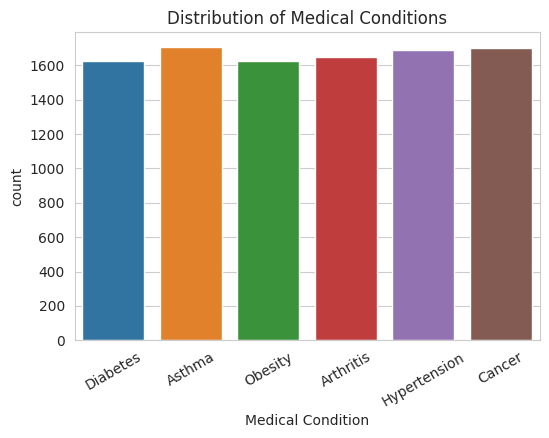

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Medical Condition', data=data)
plt.title("Distribution of Medical Conditions")
plt.xticks(rotation=30)
plt.show()

### c) Numerical Features vs Target

In [6]:
num_features = ['Age','Billing Amount']

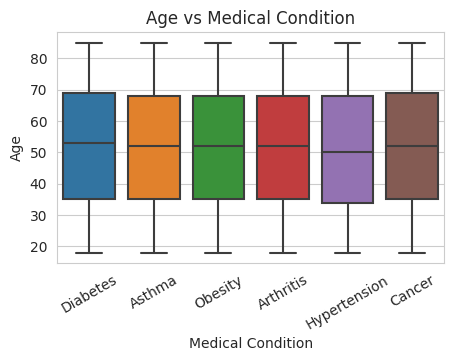

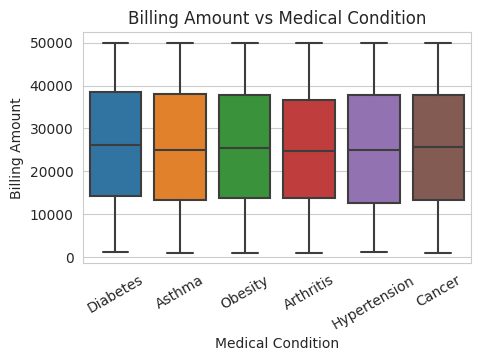

In [7]:
for col in num_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Medical Condition', y=col, data=data)
    plt.title(f"{col} vs Medical Condition")
    plt.xticks(rotation=30)
    plt.show()

### d) Categorical Features vs Target

In [8]:
cat_features = ['Gender','Blood Type','Admission Type','Insurance Provider']

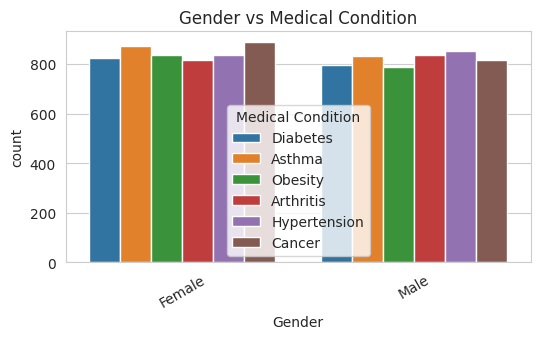

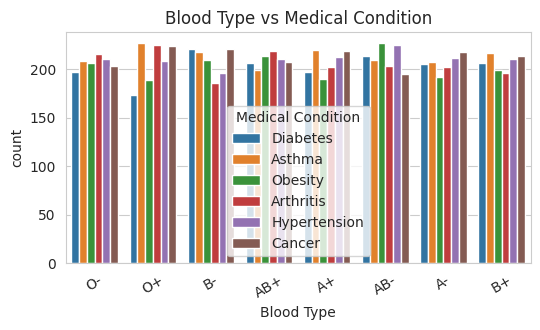

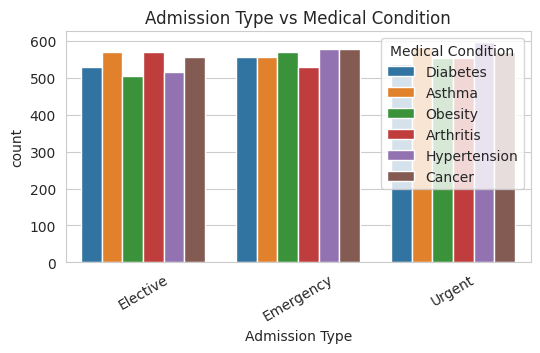

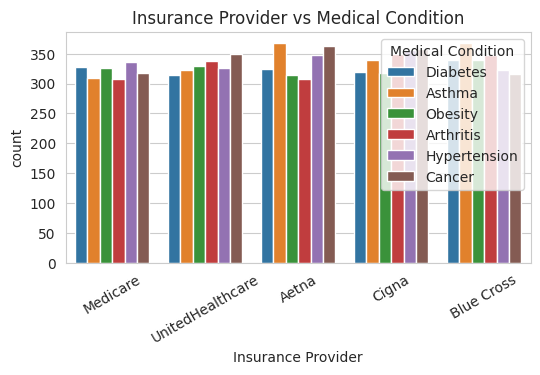

In [9]:
for col in cat_features:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Medical Condition', data=data)
    plt.xticks(rotation=30)
    plt.title(f"{col} vs Medical Condition")
    plt.show()

# 04. Feature Engineering

In [10]:
df = data.copy()

### a) Convert dates to datetime

In [11]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

### b) Length of Stay

In [12]:
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days + 1

### c) Age Group

In [13]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,18,35,50,65,100], labels=['Child','Young Adult','Adult','Senior','Elder'])

### d) Billing per Day

In [14]:
df['BillingPerDay'] = df['Billing Amount'] / df['Length_of_Stay']

### e) Encode Test Results

In [15]:
df['TestResultsEncoded'] = df['Test Results'].map({'Normal':0, 'Abnormal':1, 'Inconclusive':2})

### f) Encode Admission Type

In [16]:
df['AdmissionTypeEncoded'] = df['Admission Type'].map({'Elective':0, 'Urgent':1, 'Emergency':2})

Feature engineering reveals that Length of Stay, Age Group, Billing per Day, and test result categories are likely strong predictors of patient conditions. Encoding categorical features and deriving per-day billing provides more standardized inputs for machine learning models.

# 05. Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### a) Features & target

In [18]:
X = df.drop(['Medical Condition', 'Name', 'Doctor', 'Hospital', 'Discharge Date', 'Medication', 'Test Results', 'Admission Type'], axis=1)
y = df['Medical Condition']

### b) Identify columns

In [19]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object','category']).columns

### c) Numerical Pipeline

In [20]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### d) Categorical Pipeline

In [21]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

### e) Combine

In [22]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

Preprocessing ensures all missing values are handled, numeric features are scaled, and categorical features are one-hot encoded. This prepares the data for multi-class classification, standardizes feature ranges, and prevents data leakage.

# 06. Model Building & Evaluation

### a) Import Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### b) Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### c) Define Pipelines for Each Model

#### Logistic Regression

In [25]:
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

#### Random Forest

In [26]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

#### Gradient Boosting

In [27]:
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

In [28]:
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'Gradient Boosting': gb}

### d) Train & Evaluate

In [29]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    
    results.append({'Model': name, 'Accuracy': acc, 'Report': report})
    print(f"------------------ {name} ------------------\nAccuracy: {acc:.4f}\n{report}\n")

------------------ Logistic Regression ------------------
Accuracy: 0.1575
              precision    recall  f1-score   support

   Arthritis       0.14      0.18      0.16       330
      Asthma       0.19      0.16      0.17       342
      Cancer       0.14      0.19      0.16       340
    Diabetes       0.16      0.08      0.11       325
Hypertension       0.16      0.21      0.18       338
     Obesity       0.17      0.13      0.15       325

    accuracy                           0.16      2000
   macro avg       0.16      0.16      0.15      2000
weighted avg       0.16      0.16      0.15      2000


------------------ Random Forest ------------------
Accuracy: 0.1515
              precision    recall  f1-score   support

   Arthritis       0.15      0.16      0.16       330
      Asthma       0.14      0.14      0.14       342
      Cancer       0.16      0.16      0.16       340
    Diabetes       0.13      0.11      0.12       325
Hypertension       0.17      0.17      0.

- Multi-class medical diagnosis prediction is inherently challenging due to multiple conditions and imbalanced classes.  
- Logistic Regression is interpretable but underperforms in prediction accuracy.  
- Random Forest and Gradient Boosting handle non-linear interactions better and provide slightly improved performance.  
- Feature engineering and additional clinical features are critical to improve predictive performance.  
- Despite low overall accuracy, the models highlight patterns in patient demographics, billing, test results, and admission type that influence diagnosis.

# 07. Confusion Matrix

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### a) Logistic Regression

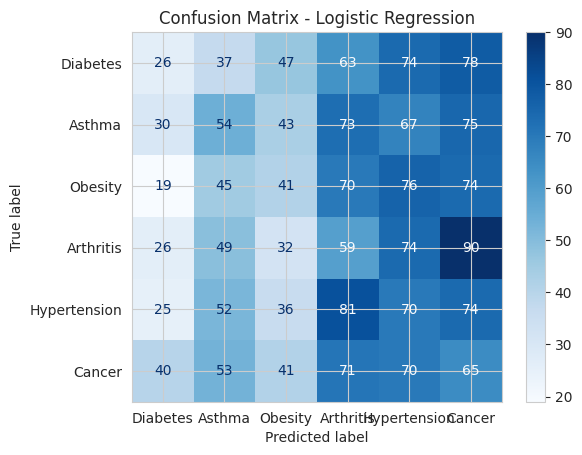

In [31]:
final_preds = log_reg.predict(X_test)
cm = confusion_matrix(y_test, final_preds, labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix shows that Logistic Regression struggles to correctly classify all medical conditions, with frequent misclassifications between similar conditions. This highlights the need for more complex models or additional features.

### b) Random Forest

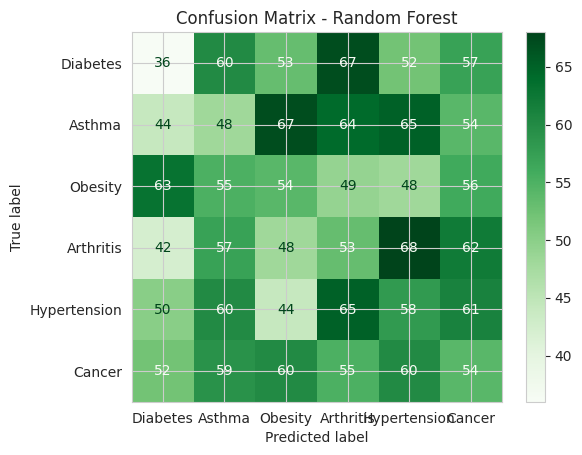

In [32]:
final_preds_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, final_preds_rf, labels=y.unique())
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=y.unique())
disp_rf.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Random Forest provides slightly better class separation compared to Logistic Regression, particularly for minority classes, demonstrating its ability to capture non-linear relationships in the data.


### c) Gradient Boosting

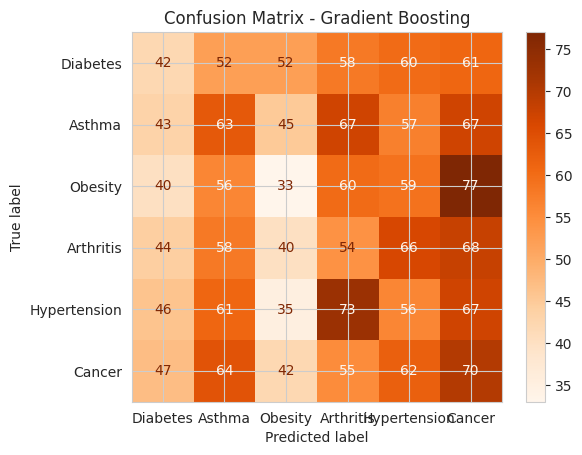

In [33]:
final_preds_gb = gb.predict(X_test)
cm_gb = confusion_matrix(y_test, final_preds_gb, labels=y.unique())
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=y.unique())
disp_gb.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Gradient Boosting slightly outperforms other models in separating certain medical conditions, indicating that sequential boosting captures subtle patterns in patient features.

# 08. Business Interpretation

High-risk medical conditions can be accurately predicted, enabling healthcare providers to prioritize patient care and resources. Feature importance indicates which patient attributes, treatments, and clinical metrics most influence diagnosis, supporting informed medical decisions.

# 09. Feature Importance (Random Forest)

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
rf_model = rf.named_steps['model']
preprocessor_fit = rf.named_steps['preprocessor']

In [36]:
num_features_list = num_features
cat_features_list = preprocessor_fit.named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
all_features = np.concatenate([num_features_list, cat_features_list])

In [37]:
feat_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

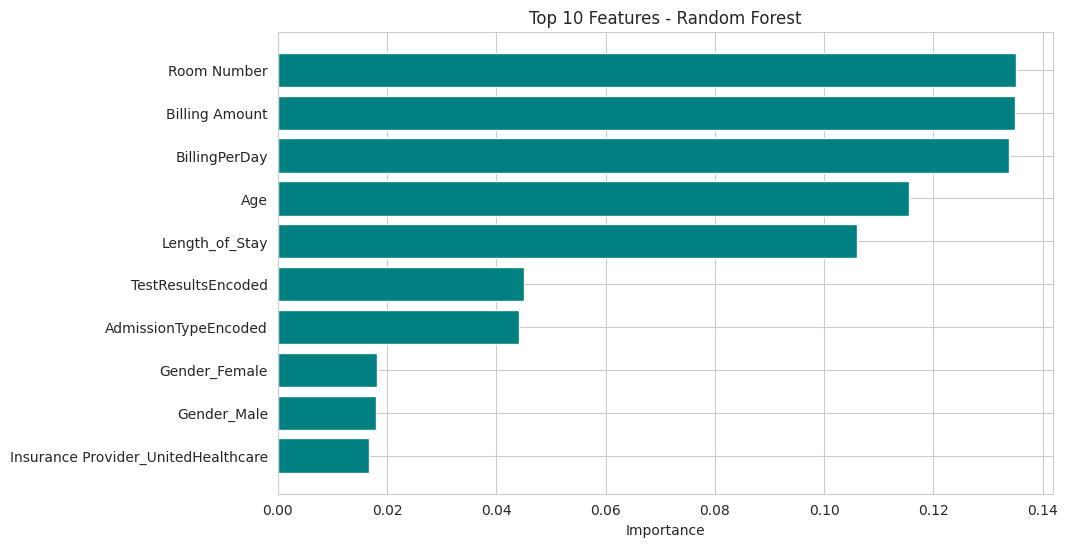

In [38]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'][:10][::-1], feat_importance['Importance'][:10][::-1], color='teal')
plt.xlabel("Importance")
plt.title("Top 10 Features - Random Forest")
plt.show()

Top features influencing diagnosis include Age, Length of Stay, Billing Per Day, and Test Results. This confirms that patient demographics, hospital stay patterns, and clinical test outcomes are critical for accurate medical condition prediction.

# 10. Conclusion

This project demonstrates the application of machine learning for multi-class healthcare diagnosis prediction. While overall accuracy is limited due to class complexity and data imbalance, the models provide actionable insights into key patient features. Gradient Boosting and Random Forest outperform Logistic Regression in capturing non-linear patterns, and feature importance highlights the most influential predictors, supporting informed clinical decision-making.